**PROBLEM STATEMENT:**
This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.
The target RainTomorrow means: Did it rain the next day? Yes or No.


**IMPORT DATA**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("https://drive.google.com/uc?id=1YCBuPeBnCtj0IaJ0fawSC6mgUIpOYPc8")


**PRINT DATA**

In [ ]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
data['RainTomorrow'].value_counts()

,count
RainTomorrow,
No,110316
Yes,31877


HANLING DUPLICATES

DROPPING SOME COLUMNS

In [ ]:
data.drop(["Date"],axis=1,inplace=True)

In [ ]:
data.duplicated().sum()

215

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

**HANDLING MISSING DATA**

VISUALIZATION

In [ ]:
categorical_columns = data.select_dtypes(include="object").columns
continous_columns = data.select_dtypes(include="float64").columns

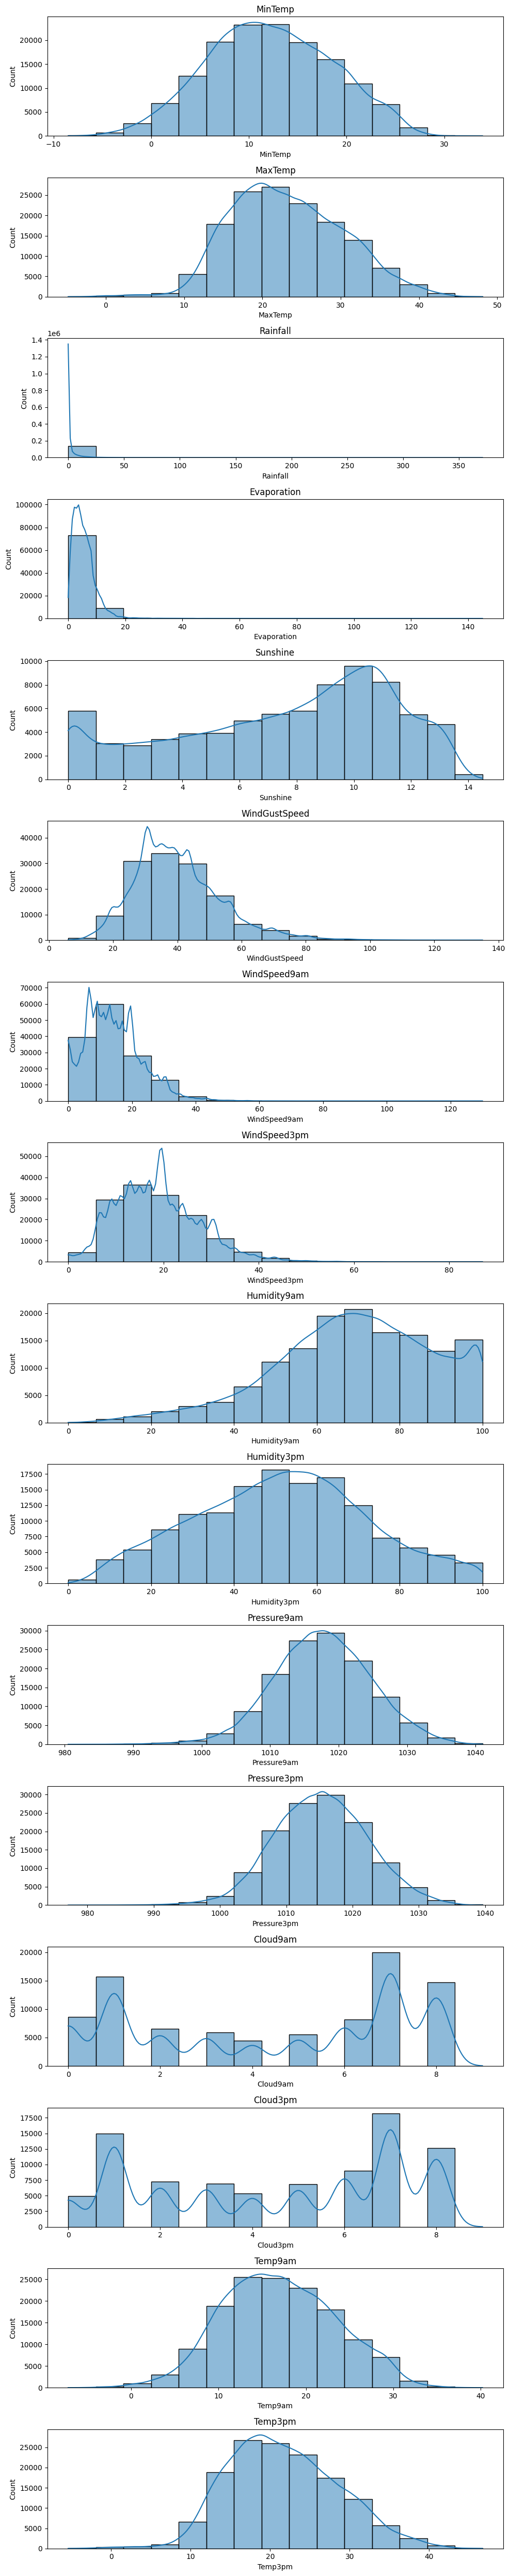

In [ ]:
fig,axs = plt.subplots(16,1,figsize=(10,50))

for i,col in enumerate(continous_columns):
  sns.histplot(data[col],ax=axs[i],kde=True,bins=15).set_title(col)
plt.tight_layout()
plt.show()

HANDLING OUTLIERS

In [ ]:
for col in continous_columns:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  data[col] = data[col].apply(lambda x: upper_bound if x>upper_bound else (lower_bound if x<lower_bound else x))

In [ ]:
data.duplicated().sum()

2

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
mean_columns=["Pressure9am","Pressure3pm","Temp9am"]
for col in continous_columns:
  if col not in mean_columns:
    data[col].fillna(data[col].mean(),inplace=True)
  else:
    data[col].fillna(data[col].median(),inplace=True)

<ipython-input-14-13d07765285a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(),inplace=True)
<ipython-input-14-13d07765285a>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:

for col in categorical_columns:
  data[col].fillna(data[col].mode()[0],inplace=True)


<ipython-input-15-29beca6237fc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0],inplace=True)


**LABEL ENCODING**

DROPPING COLUMNS BASED ON CORRELATION MATRIX\

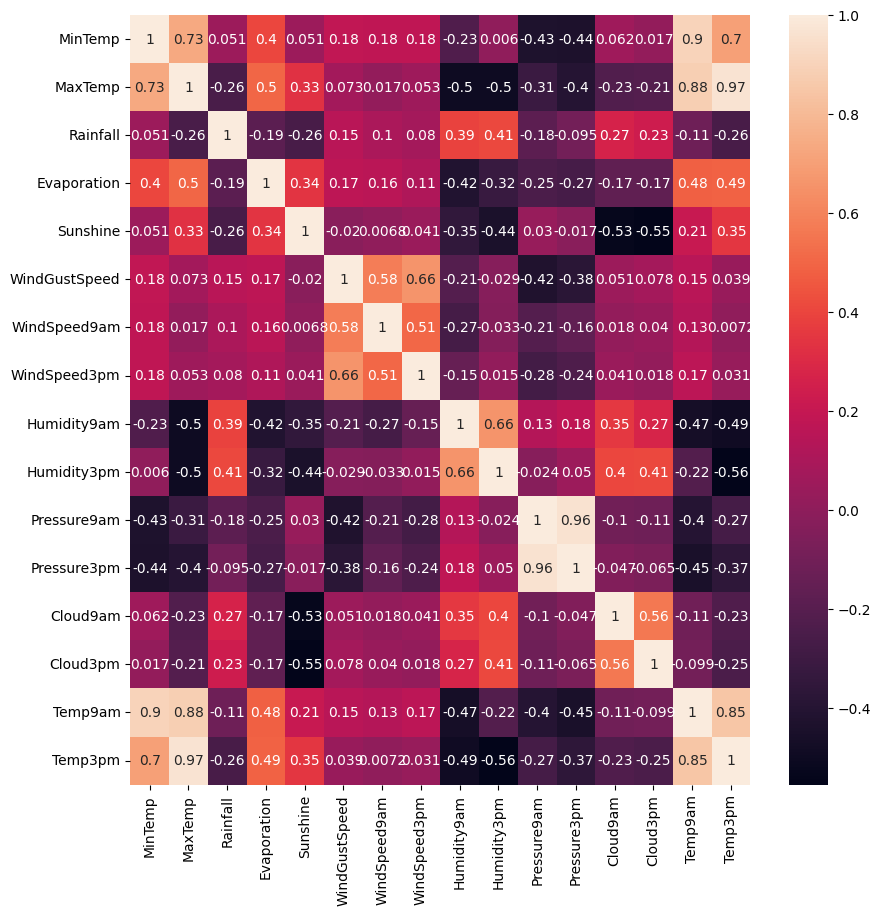

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data[continous_columns].corr(),annot=True)
plt.show()

In [ ]:
data.drop(columns=["Temp9am","MaxTemp","Pressure3pm"],inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

data["RainToday"]=data["RainToday"].map({"Yes":1,"No":0})
data["RainTomorrow"]=data["RainTomorrow"].map({"Yes":1,"No":0})

for col in categorical_columns:
  if col not in ["RainToday","RainTomorrow"]:
    data = pd.get_dummies(data, columns=[col])

In [ ]:
y = data['RainTomorrow']
X = data.drop(['RainTomorrow'],axis=1)

In [ ]:
categorical_columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [ ]:
X.head()

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,0.6,5.318673,7.611123,44.0,20.0,24.0,71.0,22.0,1007.7,...,False,False,False,False,False,False,False,False,True,False
1,7.4,0.0,5.318673,7.611123,44.0,4.0,22.0,44.0,25.0,1010.6,...,False,False,False,False,False,False,False,False,False,True
2,12.9,0.0,5.318673,7.611123,46.0,19.0,26.0,38.0,30.0,1007.6,...,False,False,False,False,False,False,False,False,False,True
3,9.2,0.0,5.318673,7.611123,24.0,11.0,9.0,45.0,16.0,1017.6,...,False,False,False,False,False,False,False,False,False,False
4,17.5,1.0,5.318673,7.611123,41.0,7.0,20.0,82.0,33.0,1010.8,...,False,True,False,False,False,False,False,False,False,False


**SPLITTING DATASET FOR TRAINING AND TESTING**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**MODEL**

In [ ]:
from sklearn.linear_model import LogisticRegression

model =LogisticRegression(max_iter=1000)

model.fit(X_train,y_train)

y_predict=model.predict(X_test)



**ACCURACY**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

print(precision_score(y_test,y_predict))

0.7194621695533272
